In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [20]:
pylum = pd.read_csv('pylum_clusters_fertility.csv')

In [26]:
# Read the csv containing new data
X_test = pylum.iloc[0, 1:32] # TO DO: change this to the new data

# Convert X to df
X_test_df = pd.DataFrame(X_test).transpose()

In [27]:
pylum_knn_model = pickle.load(open('pylum_knn', 'rb'))
y_pred = pylum_knn_model.predict(X_test_df)

In [28]:
# Print the cluster and fertility of the specific value
print('The cluster of the new data is: ', y_pred)

The cluster of the new data is:  ['2_0']


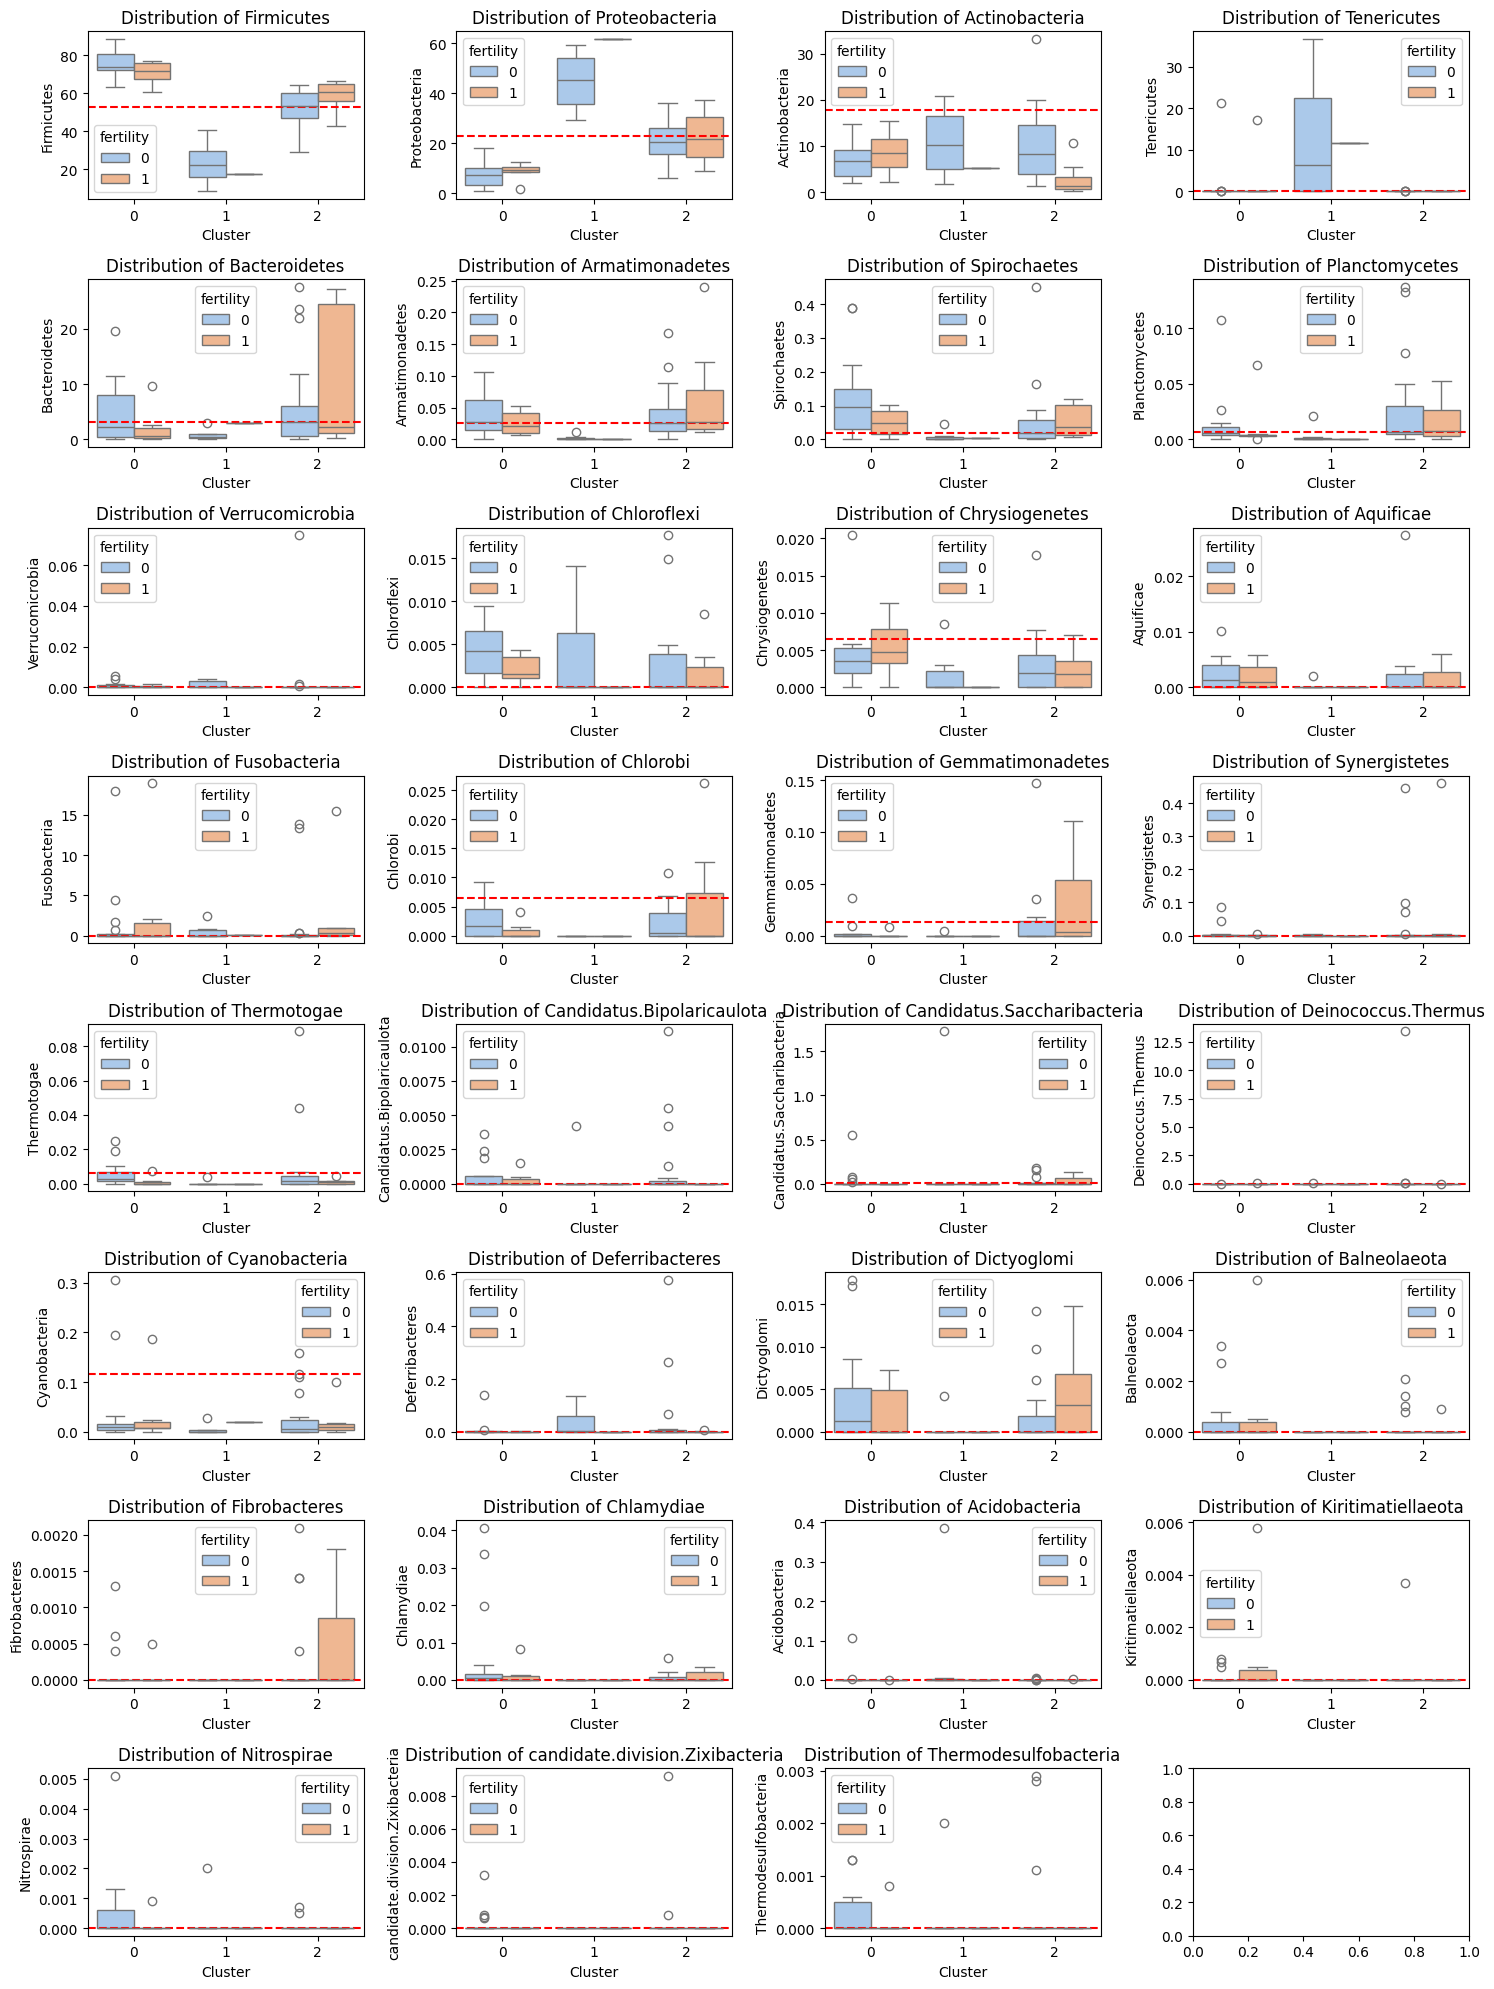

In [29]:
# Create a DataFrame with features and cluster labels
features_with_cluster = pd.read_csv('pylum_clusters_fertility.csv')

# Specify the number of rows and columns for the subplots
num_rows = 8  # Adjust based on the number of features and your preferences
num_cols = 4

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

specific_value = X_test

features = features_with_cluster.iloc[:, 1:-3]  # Features
# Plot box plots for each feature in each cluster, color-coded by fertility
for i, feature in enumerate(features.columns):
    sns.boxplot(x='cluster', y=feature, hue='fertility', data=features_with_cluster, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

    # Mark the specific value in red
    axes[i].axhline(y=specific_value[i], color='red', linestyle='--', label='Specific Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()